In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split

In [2]:
from learn.plot_deep import plot_deep 
from learn.matrix_init import matrix_init
from learn.neural_layer import neural_layer
from learn.neural_net import neural_net
from learn.dataset_gen import dataset_gen
from learn.neural_factory import neural_factory
from learn.file_io import file_io

In [3]:
# PARAMS FOR ALL NETWORKS
# sine
sine_learning_rate = 0.01
sine_no_of_epochs = 1000 
sine_dataset_path = "./data/sine"
sine_network_name = "sine_qlearn_deep_model"
# normal
normal_learning_rate = 0.001
normal_no_of_epochs = 1000 
normal_dataset_path = "./data/normal"
normal_network_name = "normal_qlearn_deep_model"
# all
dropout_rate = 0.0 
stochasticity_rates = [0, 0.25, 0.5, 0.75]

In [4]:
# TEST SPEEDUP
sine_no_of_epochs = 10
normal_no_of_epochs = 10

In [5]:
# DATASETS FOR ALL NETWORKS
# Sine environment
sine_inputs, sine_outputs = file_io.get_dataset("./data/sine")
# print("sine_inputs=", sine_inputs)
# print("sine_outputs=", sine_outputs)
# Normal environment
normal_inputs, normal_outputs = file_io.get_dataset("./data/normal")
# print("normal_inputs=", normal_inputs)
# print("normal_outputs=", normal_outputs)

./data/sine_accumulate_q_table.csv  length= 401
./data/sine_distribute_q_table.csv  length= 401
dataset_inputs[0]= ['4.01'] 401
dataset_outputs[0]= ['-1.9660779999999995' '-0.03392200000000045'] (401, 2)
./data/normal_accumulate_q_table.csv  length= 774
./data/normal_distribute_q_table.csv  length= 774
dataset_inputs[0]= ['-1.2'] 367
dataset_outputs[0]= ['3.33' '-5.32908'] (367, 2)


In [6]:
# EXPERIMENT DATA GENERATION
def get_data(learning_rate, no_of_epochs, dataset_path, network_name,
            input_data_set, output_data_set,
            training_stochasticity_rate):
    deep_qlearn = neural_factory.get_neural_net(no_of_inputs=1, no_of_neurons_layer1=25, no_of_neurons_layer2=2,
                                     learning_rate=learning_rate, network_name=network_name)
    input_data_set, output_data_set = file_io.get_dataset(dataset_path)

    return dataset_gen.data_gathering(input_data_set, output_data_set, deep_qlearn, \
                                      no_of_epochs=no_of_epochs, \
                                      dropout_rate=dropout_rate, \
                                      training_stochasticity_rate=training_stochasticity_rate)

In [7]:
# AGENT ENVIRONMENT: SINE DISTRIBUTION
def get_sine_data_for_stochasticity(training_stochasticity_rate):
    return get_data(sine_learning_rate, \
                      sine_no_of_epochs, \
                      sine_dataset_path, \
                      sine_network_name, \
                      sine_inputs, \
                      sine_outputs,
                      training_stochasticity_rate)

# AGENT ENVIRONMENT: NORMAL DISTRIBUTION
def get_normal_data_for_stochasticity(training_stochasticity_rate):
    return get_data(normal_learning_rate, \
                      normal_no_of_epochs, \
                      normal_dataset_path, \
                      normal_network_name, \
                      normal_inputs, \
                      normal_outputs,
                      training_stochasticity_rate)

In [8]:
def get_stochasticity_data(stochasticity_values):
    full_dataset = {}
    for stochasticity_rate in stochasticity_values:
        # Environment: Sine
        predicted_outputs_layer2, net_losses_layer2, \
        net_losses_layer1, net_losses_layer0, \
        param_conditioning_layer2, param_conditioning_layer1, \
        large_singular_value_layer1, small_singular_value_layer1, \
        large_singular_value_layer2, small_singular_value_layer2, \
        error_for_conditioning, error_gain_layer2 = \
        get_sine_data_for_stochasticity(training_stochasticity_rate=stochasticity_rate)
        # 
        label = '--stochasticity=' + str(stochasticity_rate)
        key = '--environment=sine' 
        full_dataset['weight_conditioning--layer=2' + key + label] = param_conditioning_layer2
        full_dataset['maximum_singular_value--layer=2' + key + label] = large_singular_value_layer2
        full_dataset['minimum_singular_value--layer=2' + key + label] = small_singular_value_layer2
        full_dataset['total_error_for_conditioning--layer=2' + key + label] = error_for_conditioning
        full_dataset['error_gain--layer=2' + key + label] = error_gain_layer2
        # Environment: Normal
        predicted_outputs_layer2, net_losses_layer2, \
        net_losses_layer1, net_losses_layer0, \
        param_conditioning_layer2, param_conditioning_layer1, \
        large_singular_value_layer1, small_singular_value_layer1, \
        large_singular_value_layer2, small_singular_value_layer2, \
        error_for_conditioning, error_gain_layer2 = \
        get_normal_data_for_stochasticity(training_stochasticity_rate=stochasticity_rate)
        # 
        key = '--environment=normal' 
        full_dataset['weight_conditioning--layer=2' + key + label] = param_conditioning_layer2
        full_dataset['maximum_singular_value--layer=2' + key + label] = large_singular_value_layer2
        full_dataset['minimum_singular_value--layer=2' + key + label] = small_singular_value_layer2
        full_dataset['total_error_for_conditioning--layer=2' + key + label] = error_for_conditioning
        full_dataset['error_gain--layer=2' + key + label] = error_gain_layer2
    return full_dataset

In [9]:
full_dataset = get_stochasticity_data(stochasticity_rates)

sine_qlearn_deep_model&layer1  no_of_inputs= 1
sine_qlearn_deep_model&layer1  no_of_neurons= 25
sine_qlearn_deep_model&layer1 layer_name learning_rate= 0.01
sine_qlearn_deep_model&layer1  weigths_matrix= [[ 0.8725882  -0.17231284  0.23427302  0.64648393 -0.41287641  0.72494268
   0.78142211  0.64463143  0.37633174  0.6298774   0.55852445  0.53386211
   0.39311734  0.86254783  0.54887527  0.80229806  0.31729196  0.63435381
   0.48115124 -0.10485162  0.79825621  0.83160009  0.97355867  0.45046143
   0.93695138]
 [ 0.63191176  0.46134321  0.89436605  0.72865431  0.67350012  0.89036385
   0.98778999  0.54579797 -0.28958281  0.87667779  0.97109025  0.60254747
   0.20770272  0.86614329  0.7817782   0.91713785  0.81850576  0.63144572
   0.97923884  0.41031785  0.6000643   0.32479627  0.02317527  0.86899002
  -0.12943338]] (2, 25)
sine_qlearn_deep_model&layer2  no_of_inputs= 25
sine_qlearn_deep_model&layer2  no_of_neurons= 2
sine_qlearn_deep_model&layer2 layer_name learning_rate= 0.01
sine_qle

*** BACKPROP[0] ->  204.5591557861116 (25,)
*** FINAL_BIAS= -0.06888819036153698 ()
*** FINAL_WEIGHTS[0]= 0.085889541820126 (25,)
*** BACKPROP[0] ->  354.6581111919028 (25,)
*** FINAL_BIAS= 0.13220526964054943 ()
*** FINAL_WEIGHTS[0]= -0.1570594467898716 (25,)
*** BACKPROP[0] ->  234.52188496409772 (25,)
*** FINAL_BIAS= -0.0713343536708294 ()
*** FINAL_WEIGHTS[0]= 0.0818032523516919 (25,)
*** BACKPROP[0] ->  346.1112101766287 (25,)
*** FINAL_BIAS= 0.1314591785815908 ()
*** FINAL_WEIGHTS[0]= -0.1609080006143369 (25,)
*** BACKPROP[0] ->  161.88699313587455 (25,)
*** FINAL_BIAS= -0.07347301482485194 ()
*** FINAL_WEIGHTS[0]= 0.07833294318241432 (25,)
*** BACKPROP[0] ->  298.9158050563581 (25,)
*** FINAL_BIAS= 0.13108746089954962 ()
*** FINAL_WEIGHTS[0]= -0.16392915121550175 (25,)
*** BACKPROP[0] ->  216.95659773781378 (25,)
*** FINAL_BIAS= -0.07544022019598821 ()
*** FINAL_WEIGHTS[0]= 0.07562286375797345 (25,)
*** BACKPROP[0] ->  330.31722160222495 (25,)
*** FINAL_BIAS= 0.13091253288753268

*** FINAL_BIAS= 0.007912737320045046 ()
*** FINAL_WEIGHTS[0]= -0.1428917143495506 (25,)
*** BACKPROP[0] ->  75.04256414399183 (25,)
*** FINAL_BIAS= 0.12402843417442885 ()
*** FINAL_WEIGHTS[0]= -0.11490896294096611 (25,)
*** BACKPROP[0] ->  127.9308402776946 (25,)
*** FINAL_BIAS= 0.007790301316418119 ()
*** FINAL_WEIGHTS[0]= -0.14462095877645967 (25,)
*** BACKPROP[0] ->  151.93392815846505 (25,)
*** FINAL_BIAS= 0.12132308060716074 ()
*** FINAL_WEIGHTS[0]= -0.11562109045318608 (25,)
*** BACKPROP[0] ->  285.6868079922126 (25,)
*** FINAL_BIAS= 0.011698086184253382 ()
*** FINAL_WEIGHTS[0]= -0.14059645459993328 (25,)
*** BACKPROP[0] ->  67.53471433993607 (25,)
*** FINAL_BIAS= 0.11562287929528832 ()
*** FINAL_WEIGHTS[0]= -0.12090675153641099 (25,)
*** BACKPROP[0] ->  125.76227571190088 (25,)
*** FINAL_BIAS= 0.012616293307819848 ()
*** FINAL_WEIGHTS[0]= -0.1408787343678846 (25,)
*** BACKPROP[0] ->  147.5354800965678 (25,)
*** FINAL_BIAS= 0.11282855187180078 ()
*** FINAL_WEIGHTS[0]= -0.12178439

*** FINAL_BIAS= -0.1261032659767126 ()
*** FINAL_WEIGHTS[0]= -0.06360745273041792 (25,)
*** BACKPROP[0] ->  -5.668169960270799 (25,)
*** FINAL_BIAS= 0.16212486988401978 ()
*** FINAL_WEIGHTS[0]= 0.012870049138780822 (25,)
*** BACKPROP[0] ->  -4.844177846349592 (25,)
*** FINAL_BIAS= -0.12566706535706246 ()
*** FINAL_WEIGHTS[0]= -0.06449862806042818 (25,)
*** BACKPROP[0] ->  127.7667430430009 (25,)
*** FINAL_BIAS= 0.1609082123927359 ()
*** FINAL_WEIGHTS[0]= 0.012521221687166916 (25,)
*** BACKPROP[0] ->  246.94006096542117 (25,)
*** FINAL_BIAS= -0.12516180859370388 ()
*** FINAL_WEIGHTS[0]= -0.06540897838270505 (25,)
*** BACKPROP[0] ->  -5.008805612077499 (25,)
*** FINAL_BIAS= 0.15966850065092938 ()
*** FINAL_WEIGHTS[0]= 0.012663082261520646 (25,)
*** BACKPROP[0] ->  -5.542539068704462 (25,)
*** FINAL_BIAS= -0.12465596328212897 ()
*** FINAL_WEIGHTS[0]= -0.06596015795425178 (25,)
*** BACKPROP[0] ->  129.28103630099224 (25,)
*** FINAL_BIAS= 0.15849757031540643 ()
*** FINAL_WEIGHTS[0]= 0.01250

*** BACKPROP[0] ->  208.33979596191395 (25,)
*** FINAL_BIAS= 0.15384948403650509 ()
*** FINAL_WEIGHTS[0]= -0.08255282571533484 (25,)
*** BACKPROP[0] ->  275.64464690066006 (25,)
*** FINAL_BIAS= -0.07497078196645059 ()
*** FINAL_WEIGHTS[0]= -0.1000860533776788 (25,)
*** BACKPROP[0] ->  73.14156925279967 (25,)
*** FINAL_BIAS= 0.10841373795161456 ()
*** FINAL_WEIGHTS[0]= -0.22153023966187732 (25,)
*** BACKPROP[0] ->  452.6888246354844 (25,)
*** FINAL_BIAS= -0.08616399112047196 ()
*** FINAL_WEIGHTS[0]= -0.11916645052681588 (25,)
*** BACKPROP[0] ->  199.83420224737083 (25,)
*** FINAL_BIAS= 0.15909201844320014 ()
*** FINAL_WEIGHTS[0]= -0.08247417488445549 (25,)
*** BACKPROP[0] ->  286.1163350340115 (25,)
*** FINAL_BIAS= -0.08221136575317946 ()
*** FINAL_WEIGHTS[0]= -0.09680556752732394 (25,)
*** BACKPROP[0] ->  71.53312383706724 (25,)
*** FINAL_BIAS= 0.11158625448763057 ()
*** FINAL_WEIGHTS[0]= -0.22736035587765424 (25,)
*** BACKPROP[0] ->  475.58669536011985 (25,)
*** FINAL_BIAS= -0.0924606

*** FINAL_WEIGHTS[0]= 0.060023243063732606 (25,)
*** BACKPROP[0] ->  304.7848375085586 (25,)
*** FINAL_BIAS= 0.166541744745594 ()
*** FINAL_WEIGHTS[0]= 0.005543574102184052 (25,)
*** BACKPROP[0] ->  205.061858636219 (25,)
*** FINAL_BIAS= 0.12256040421057504 ()
*** FINAL_WEIGHTS[0]= 0.060186304130392235 (25,)
*** BACKPROP[0] ->  403.36720897885573 (25,)
*** FINAL_BIAS= 0.16709659281012132 ()
*** FINAL_WEIGHTS[0]= 0.005236946879337124 (25,)
*** BACKPROP[0] ->  151.15902159016642 (25,)
*** FINAL_BIAS= 0.12128425433717041 ()
*** FINAL_WEIGHTS[0]= 0.06009256248710127 (25,)
*** BACKPROP[0] ->  302.26472025463664 (25,)
*** FINAL_BIAS= 0.16769551126718277 ()
*** FINAL_WEIGHTS[0]= 0.004826780244906653 (25,)
*** BACKPROP[0] ->  204.96806897379483 (25,)
*** FINAL_BIAS= 0.11996423255383877 ()
*** FINAL_WEIGHTS[0]= 0.06033348470412135 (25,)
*** BACKPROP[0] ->  401.3243442327724 (25,)
sine_qlearn_deep_model&layer1  no_of_inputs= 1
sine_qlearn_deep_model&layer1  no_of_neurons= 25
sine_qlearn_deep_mod

*** FINAL_WEIGHTS[0]= -0.07974047440144438 (25,)
*** BACKPROP[0] ->  204.10044864957695 (25,)
*** FINAL_BIAS= -0.004972701801929611 ()
*** FINAL_WEIGHTS[0]= 0.13653409339099698 (25,)
*** BACKPROP[0] ->  97.74697957705088 (25,)
*** FINAL_BIAS= -0.042540183050566255 ()
*** FINAL_WEIGHTS[0]= -0.07845307928636058 (25,)
*** BACKPROP[0] ->  198.16927754552276 (25,)
*** FINAL_BIAS= -0.007058815911485501 ()
*** FINAL_WEIGHTS[0]= 0.12626368480594152 (25,)
*** BACKPROP[0] ->  134.8720253364281 (25,)
*** FINAL_BIAS= -0.04369641148233264 ()
*** FINAL_WEIGHTS[0]= -0.07748234503473225 (25,)
*** BACKPROP[0] ->  199.3508697825992 (25,)
*** FINAL_BIAS= -0.008626409079319096 ()
*** FINAL_WEIGHTS[0]= 0.11721615973471163 (25,)
*** BACKPROP[0] ->  87.12906886003664 (25,)
*** FINAL_BIAS= -0.0448790769305299 ()
*** FINAL_WEIGHTS[0]= -0.07605544917049634 (25,)
*** BACKPROP[0] ->  195.27419068026197 (25,)
*** FINAL_BIAS= -0.009887665893540636 ()
*** FINAL_WEIGHTS[0]= 0.10977973377350363 (25,)
*** BACKPROP[0] -

In [10]:
print("full_dataset=",full_dataset)

full_dataset= {'weight_conditioning--layer=2--environment=sine--stochasticity=0': array([[0.        , 1.14541569],
       [1.        , 1.1202747 ],
       [2.        , 1.10593262],
       [3.        , 1.09734378],
       [4.        , 1.09180107],
       [5.        , 1.08793607],
       [6.        , 1.08509929],
       [7.        , 1.08303534],
       [8.        , 1.08171897],
       [9.        , 1.0812637 ]]), 'maximum_singular_value--layer=2--environment=sine--stochasticity=0': array([[0.        , 0.68200164],
       [1.        , 0.66195298],
       [2.        , 0.64978358],
       [3.        , 0.64235865],
       [4.        , 0.63788041],
       [5.        , 0.63533623],
       [6.        , 0.63415714],
       [7.        , 0.63402734],
       [8.        , 0.63478057],
       [9.        , 0.63634113]]), 'minimum_singular_value--layer=2--environment=sine--stochasticity=0': array([[0.        , 0.59541845],
       [1.        , 0.59088452],
       [2.        , 0.58754355],
       [3.     

In [11]:
def box_plot_singular_values(data, environment_name):
    # config
    overall_title="Singular Values vs Conditioning (environment=" + environment_name + ')' 
    x_label="Epoch"
    y_label="Maximum Singular Value"
    # proportions
    figure(num=None, figsize=(10, 25), dpi=50, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 18})
    plt.subplots_adjust(hspace=0.3) # left=5, bottom=5, right=5, top=5, wspace=5, 
    
    ## MAX SINGULAR VALUES
    # 
    max_line1 = data['maximum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0']
    time_ticks_1 = np.array([column[0] for column in max_line1])
    max_value_ticks_1 = np.array([column[1] for column in max_line1])
    # 
    max_line2 = data['maximum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.25']
    max_value_ticks_2 = np.array([column[1] for column in max_line2])
    # 
    max_line3 = data['maximum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.5']
    max_value_ticks_3 = np.array([column[1] for column in max_line3])
    # 
    max_line4 = data['maximum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.75']
    max_value_ticks_4 = np.array([column[1] for column in max_line4])
    
    ## MIN SINGULAR VALUES
    # 
    min_line1 = data['minimum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0']
    min_value_ticks_1 = np.array([column[1] for column in min_line1])
    # 
    min_line2 = data['minimum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.25']
    min_value_ticks_2 = np.array([column[1] for column in min_line2])
    # 
    min_line3 = data['minimum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.5']
    min_value_ticks_3 = np.array([column[1] for column in min_line3])
    # 
    min_line4 = data['minimum_singular_value--layer=2--environment='+environment_name+'--stochasticity=0.75']
    min_value_ticks_4 = np.array([column[1] for column in min_line4])
    
    ## CONDITIONING
    # 
    conditioning_line1 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0']
    conditioning_value_ticks_1 = np.array([column[1] for column in conditioning_line1])
    # 
    conditioning_line2 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.25']
    conditioning_value_ticks_2 = np.array([column[1] for column in conditioning_line2])
    # 
    conditioning_line3 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.5']
    conditioning_value_ticks_3 = np.array([column[1] for column in conditioning_line3])
    # 
    conditioning_line4 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.75']
    conditioning_value_ticks_4 = np.array([column[1] for column in conditioning_line4])

    # PLOT MAX VALUE
    # print("max_line1=", max_line1)
    plt.subplot(4, 1, 1)
    plt.grid(True)
    # legend
    line_1, = plt.plot(time_ticks_1, max_value_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, max_value_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, max_value_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, max_value_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Maximum Singular Value")

    # PLOT MIN VALUE
    plt.subplot(4, 1, 2)
    plt.grid(True)
    # legend ... , marker=r'$\bowtie$'
    line_1, = plt.plot(time_ticks_1, min_value_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, min_value_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, min_value_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, min_value_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Minimum Singular Value")
    
    # PLOT CONDITIONING
    plt.subplot(4, 1, 3)
    plt.grid(True)
    # legend ... , marker=r'$\bowtie$'
    line_1, = plt.plot(time_ticks_1, conditioning_value_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, conditioning_value_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, conditioning_value_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, conditioning_value_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Conditioning Value")

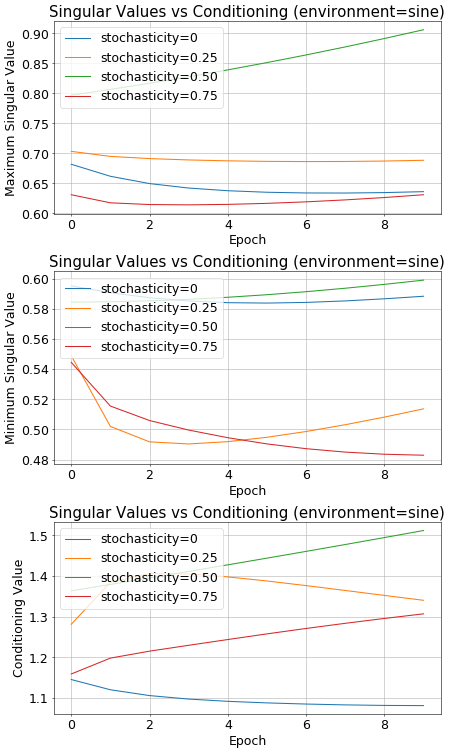

In [12]:
box_plot_singular_values(full_dataset, 'sine')

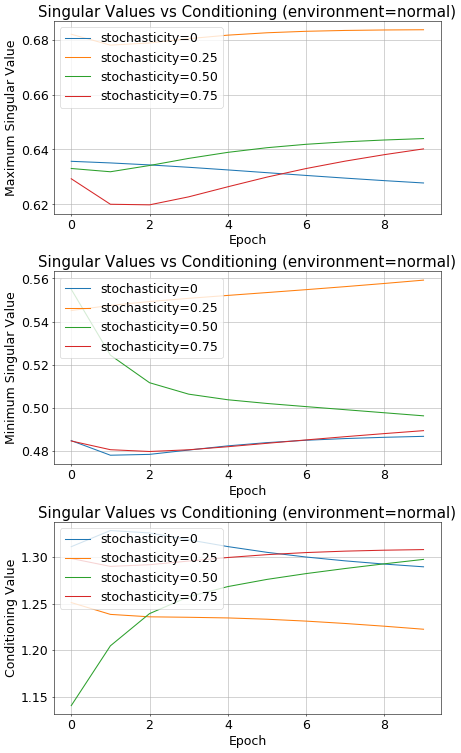

In [13]:
box_plot_singular_values(full_dataset, 'normal')

In [14]:
def box_plot_error(data, environment_name):
    # config
    overall_title="Test Error vs Conditioning (environment=" + environment_name + ')' 
    x_label="Epoch"
    # y_label="Maximum Singular Value"
    
    # proportions
    figure(num=None, figsize=(10, 25), dpi=50, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 18})
    plt.subplots_adjust(hspace=0.3) # left=5, bottom=5, right=5, top=5, wspace=5, 
    
    ## TOTAL ERROR
    # 
    error_line1 = data['total_error_for_conditioning--layer=2--environment='+environment_name+'--stochasticity=0']
    time_ticks_1 = np.array([column[0] for column in error_line1])
    total_error_ticks_1 = np.array([column[1] for column in error_line1])
    # 
    error_line2 = data['total_error_for_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.25']
    total_error_ticks_2 = np.array([column[1] for column in error_line2])
    # 
    error_line3 = data['total_error_for_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.5']
    total_error_ticks_3 = np.array([column[1] for column in error_line3])
    # 
    error_line4 = data['total_error_for_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.75']
    total_error_ticks_4 = np.array([column[1] for column in error_line4])
    
    ## ERROR GAIN
    # 
    gain_line1 = data['error_gain--layer=2--environment='+environment_name+'--stochasticity=0']
    error_gain_ticks_1 = np.array([column[1] for column in gain_line1])
    # 
    gain_line2 = data['error_gain--layer=2--environment='+environment_name+'--stochasticity=0.25']
    error_gain_ticks_2 = np.array([column[1] for column in gain_line2])
    # 
    gain_line3 = data['error_gain--layer=2--environment='+environment_name+'--stochasticity=0.5']
    error_gain_ticks_3 = np.array([column[1] for column in gain_line3])
    # 
    gain_line4 = data['error_gain--layer=2--environment='+environment_name+'--stochasticity=0.75']
    error_gain_ticks_4 = np.array([column[1] for column in gain_line4])
    
    ## CONDITIONING
    # 
    conditioning_line1 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0']
    conditioning_value_ticks_1 = np.array([column[1] for column in conditioning_line1])
    # 
    conditioning_line2 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.25']
    conditioning_value_ticks_2 = np.array([column[1] for column in conditioning_line2])
    # 
    conditioning_line3 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.5']
    conditioning_value_ticks_3 = np.array([column[1] for column in conditioning_line3])
    # 
    conditioning_line4 = data['weight_conditioning--layer=2--environment='+environment_name+'--stochasticity=0.75']
    conditioning_value_ticks_4 = np.array([column[1] for column in conditioning_line4])

    # PLOT TOTAL ERROR
    # print("max_line1=", max_line1)
    plt.subplot(4, 1, 1)
    plt.grid(True)
    # legend
    line_1, = plt.plot(time_ticks_1, total_error_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, total_error_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, total_error_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, total_error_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Total Error")

    # PLOT ERROR GAIN
    plt.subplot(4, 1, 2)
    plt.grid(True)
    # legend ... , marker=r'$\bowtie$'
    line_1, = plt.plot(time_ticks_1, error_gain_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, error_gain_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, error_gain_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, error_gain_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Gain on Total Error")
    
    # PLOT CONDITIONING
    plt.subplot(4, 1, 3)
    plt.grid(True)
    # legend ... , marker=r'$\bowtie$'
    line_1, = plt.plot(time_ticks_1, conditioning_value_ticks_1, label="stochasticity=0")   
    line_2, = plt.plot(time_ticks_1, conditioning_value_ticks_2, label="stochasticity=0.25")   
    line_3, = plt.plot(time_ticks_1, conditioning_value_ticks_3, label="stochasticity=0.50")   
    line_4, = plt.plot(time_ticks_1, conditioning_value_ticks_4, label="stochasticity=0.75")   
    plt.legend(handles=[line_1, line_2, line_3, line_4], loc=2)
    # plot
    plt.title(overall_title)
    plt.xlabel(x_label)
    plt.ylabel("Conditioning Value")

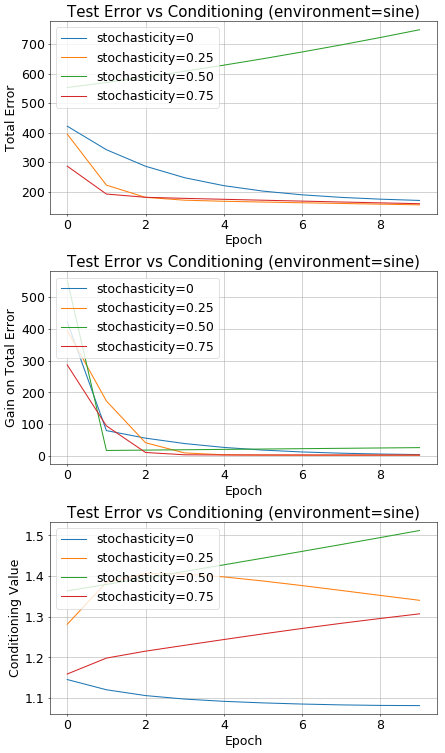

In [15]:
box_plot_error(full_dataset, 'sine')

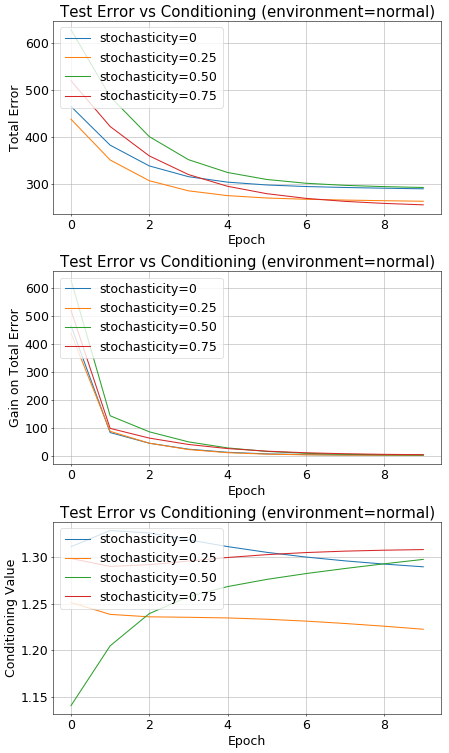

In [17]:
box_plot_error(full_dataset, 'normal')

In [16]:
# datetime.datetime.now()